<a href="https://colab.research.google.com/github/ruchita300601/Credit-card-fraud-detection-/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING THE ESSENTIAL LIBRARIES

In [ ]:
# main libraries
import pandas as pd
import numpy as np
import time

# visual libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



#  READING THE CSV FILE INTO THE PYTHON

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mini/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# we have loaded the into a data frame , df.head() shows first five rows from our data set

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.1727485630620034 %
non frauds : 99.82725143693798 %


# we are plotting a bar graph for the fraud and non fraud transaction

Text(0, 0.5, 'Frequency')

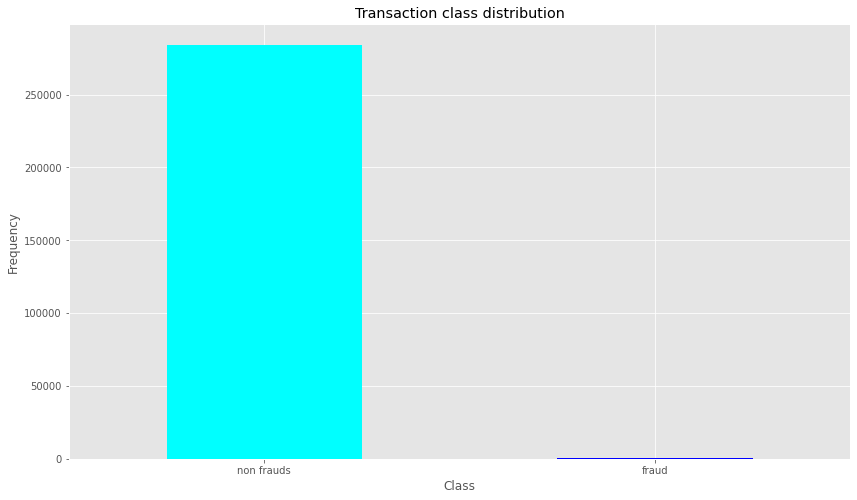

In [ ]:
# Let's plot the Transaction class against the Frequency
x ='non frauds'
y= 'fraud'
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0 , color=['cyan' , 'blue'])
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

**As we can see the data is unbalanced.**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


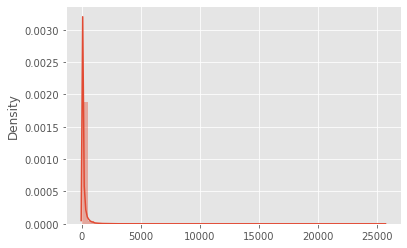

In [ ]:
amount = [df['Amount'].values]
sns.distplot(amount)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


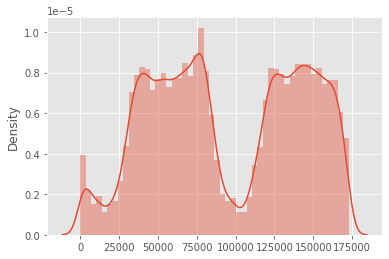

In [ ]:
time = df['Time'].values
sns.distplot(time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

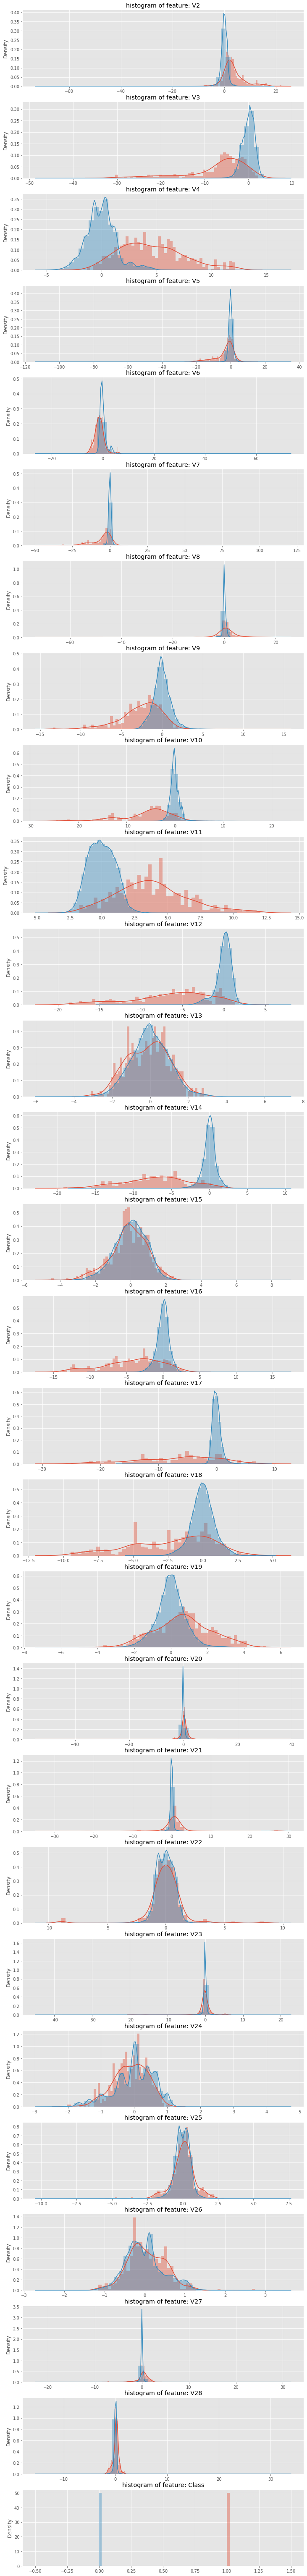

In [ ]:
anomalous_features = df.iloc[:,1:29].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

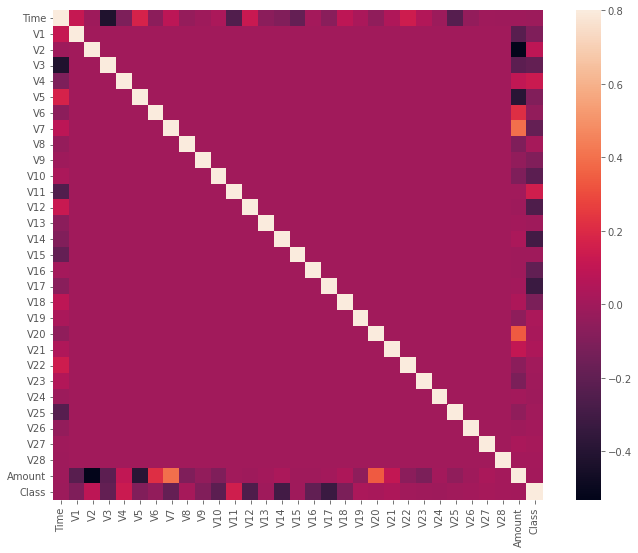

In [ ]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [ ]:
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [ ]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,1.571670,-0.675257,0
1,-1.086306,-0.283503,0
2,2.053389,1.078176,0
3,1.150168,-0.426788,0
4,1.143769,-1.342386,0


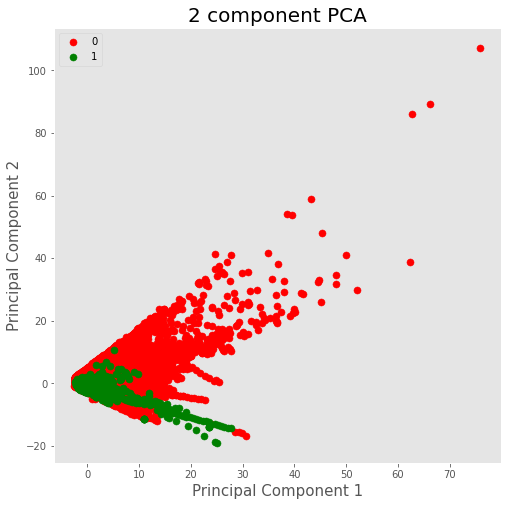

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
23308,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,-2.734156,...,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,1,-0.353229,-1.308284
142513,-2.342599,0.975931,0.899546,-0.324797,-2.211083,-0.160202,-0.640255,1.357890,-0.074411,-0.774100,...,1.015605,0.416765,0.566111,-0.155835,0.251011,-0.233865,-0.237199,0,0.259877,-0.211608
131272,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,-1.242265,0.269562,...,1.196428,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,1,-0.352430,-0.321636
12388,1.183105,-0.382119,1.310344,0.166760,-1.209526,-0.015391,-1.165674,0.236423,2.143871,-0.340718,...,0.337037,-0.034844,-0.014736,-0.000417,1.081655,-0.071832,0.000811,0,-0.281464,-1.539373
71059,-0.555312,-0.753507,2.781164,-0.181743,-1.546480,0.358995,-0.929866,0.352361,0.145793,-0.051367,...,-0.415311,0.079197,0.445848,-0.464088,1.127936,0.115096,0.133331,0,-0.153325,-0.856654


Text(0, 0.5, 'Frequency')

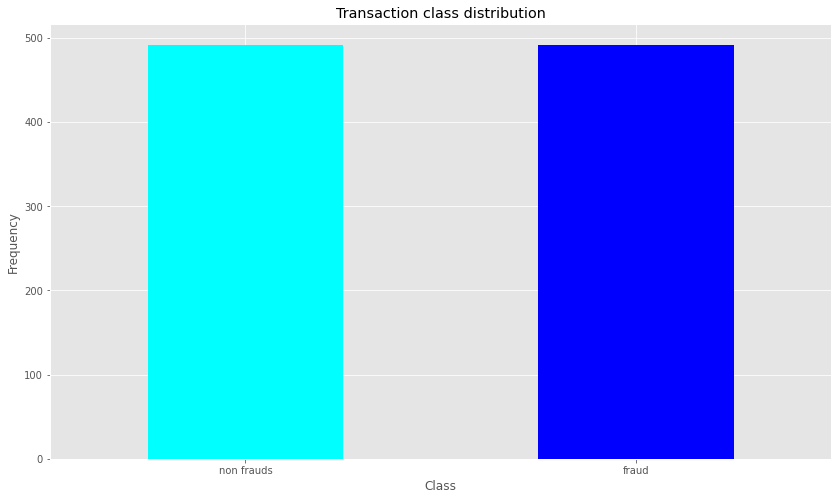

In [ ]:
x= 'non frauds'
y= 'fraud'
classes = pd.value_counts(new_df['Class'], sort = True )
classes.plot(kind = 'bar', rot=0 , color= ['cyan' , 'blue'])
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency" )

In [ ]:
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

feature_array = features.values
label_array = labels.values


In [ ]:
# splitting the faeture array and label array keeping 80% for the trainnig sets
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test=normalize(X_test)

In [ ]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)

    #Fit the model
    knn.fit(X_train,y_train.ravel())

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel())

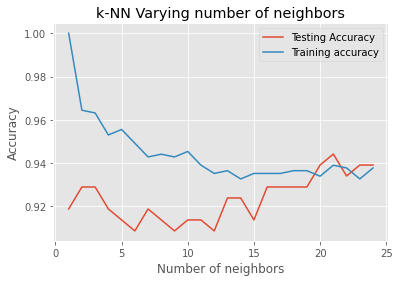

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [ ]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=21)

In [ ]:
# predicting labels for testing set
knn_predicted_test_labels=knn.predict(X_test)

In [ ]:
#scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(y_test,knn_predicted_test_labels)

In [ ]:
#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.9441624365482234
Precison --> 0.9759036144578314
Recall --> 0.9
F1 --> 0.9364161849710982
MCC --> 0.8890979046899178
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       107
           1       0.98      0.90      0.94        90

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



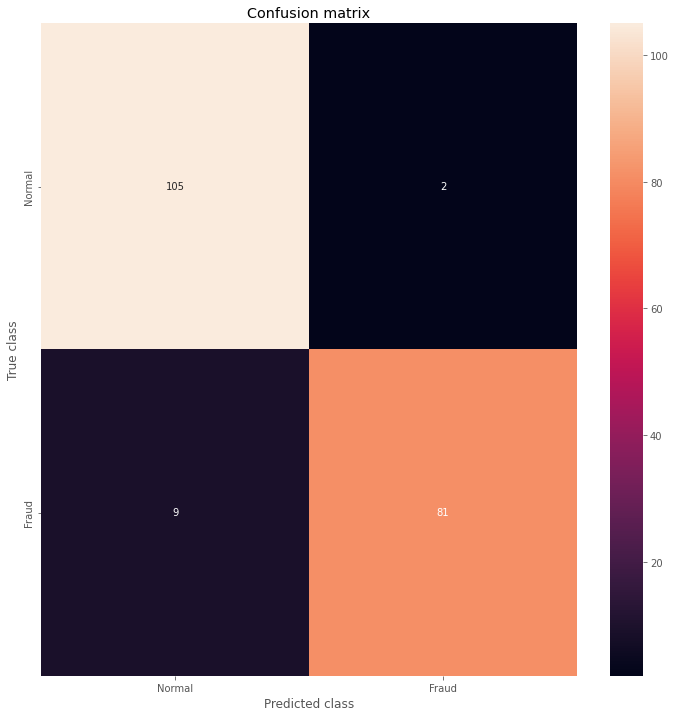

In [ ]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             =    matthews_corrcoef(y_test,knn_predicted_test_labels)

In [ ]:
print(knn_accuracy_score)

0.9441624365482234


In [ ]:
print(knn_f1_score)

0.9364161849710982
